# 5 Minute Tutorial Series

## Groups in Enterprise and ArcGIS Online

<img src="./img/welcome_group.jpg" width=350/>

A **group** is a collection of maps and apps usually related to a specific area of interest

- It can be about cats 🐱
- It can be about emergency management 🏥
- It can be about whatever you want, the site doesn't judge

**Get it? 👍**




## I Need This Now! How do I do it?

### Setup the Environment

In [2]:
from arcgis.gis import GIS

### Connect to Site

In [3]:
gis = GIS(profile='your_online_profile')

### The `GroupManager`

In the `ArcGIS API for Python` you can create new groups in one line of code!

#### Ensure Group Does Not Exists

In [11]:
gis.groups.search("OSM Iceland Data")

[]

#### Create Group

- For readability, expand it over multiple lines

<Group title:"OSM Iceland Data" owner:andrew57>
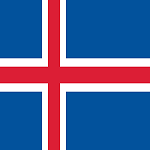

In [23]:
grp = gis.groups.create(
    title="OSM Iceland Data",
    auto_join=True,
    tags='iceland, working group, geothermal',
    thumbnail=("https://upload.wikimedia.org/wikipedia/commons/t"
               "humb/c/ce/Flag_of_Iceland.svg/2000px-Flag_of_Iceland.svg.png")
)
grp

#### Add Content You Own to the Group

In [24]:
for i in gis.content.search("Iceland"):
    if i.type == "Feature Service":
        # share with group
        i.share(groups=[grp.id])

In [30]:
for i in gis.content.search("Iceland"):
    if i.type == "Feature Service":
        print(i.shared_with)

{'everyone': False, 'org': False, 'groups': [<Group title:"OSM Iceland Data" owner:andrew57>]}


#### Adding Public Content to the Group

- Public content can be added to any group

In [37]:
bbox = "-24.5319933, 62.0079024,-6.766673400000002, 66.91284349999998"
search_result = gis.content.advanced_search("Iceland type: 'Web Map'",
                                            bbox=bbox)
for wm in search_result['results']:
    wm.share(groups=[grp])

The groups has 101 items


<Item title:" Icelandic Eyjafjallajökull eruption" type:Web Map owner:isaachathaway28>
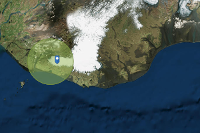

In [45]:
print(f"The groups has {len(grp.content(1000))} items")
grp.content(1)[0]

#### Adding/Removing Users 

**Adding Users**

In [55]:
users = [u for u in gis.users.search("*") if u.username != gis.users.me.username][:-4]
grp.add_users(usernames=users)

{'notAdded': []}

**Removing Users**

- remove users by the username or `User` object

In [56]:
grp.remove_users(grp.get_members()['users'])

{'notRemoved': []}

#### Deleting Groups

- delete groups does not effect content
- all items remain and only group goes away
- once the event or group is no longer needed, erase it

In [57]:
grp.delete()

True